### Problem approachs

#### 1) Understand the problem.  Deep analisys of each variable  about their meaning and importance to this problem

#### 2) Univariable study.  Only focusing on the dependent variable 'SalePrice' and try to learn more about it.

#### 3) Multivariate study. Relationship between  dependent variables and independent variables.

#### 4) Basic cleaning. Clean the dataset and handle the missing data, outliers and categoriacal variables.

#### 5) Test assumptions. To check if our data meets the assumptions required by most multivariate techniques.


### 1) Understand the problem.

In [1]:
# Libraries imported

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm # To analize normal distribution
from sklearn.preprocessing import StandardScaler # Transform data such that its distribution will have a mean value 0 and sd of 1
from scipy import stats # This module contains a large number of probability distributions
import warnings
warnings.filterwarnings('ignore') # To hide all python warnings
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100}) # Setup of plt chars


In [2]:
# Load data

df_train = pd.read_csv('data/train.csv')

In [3]:
# Check data decoration

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data expectation

#### We can create an excel spreadsheet with columns in order to understand our data. For example:

###### - Variable - Name of variable
###### - Type - Numerical or categorical
###### - Segment - Building, space or location
###### - Expectation - High, Medium and Low (Most important column at first)
###### - Conclusion - Conclusions about variable importance
###### - Comments - Any comments


### Take High expectation variables and made scatters to prove our expectations

#### I went through this process and concluded that the following variables can play an important role in this problem:

##### OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
##### YearBuilt.
##### TotalBsmtSF.
##### GrLivArea.


### PROBLEMS WITH THIS PROCEDURE: 

##### Use scatter plots instead box-plots with CATEGORICAL VARIABLES, could be inconvenient.
##### We're relying on sujetive judgment when we were determinating the expectations.

### 

### 2)  Analysing 'SalePrice'

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

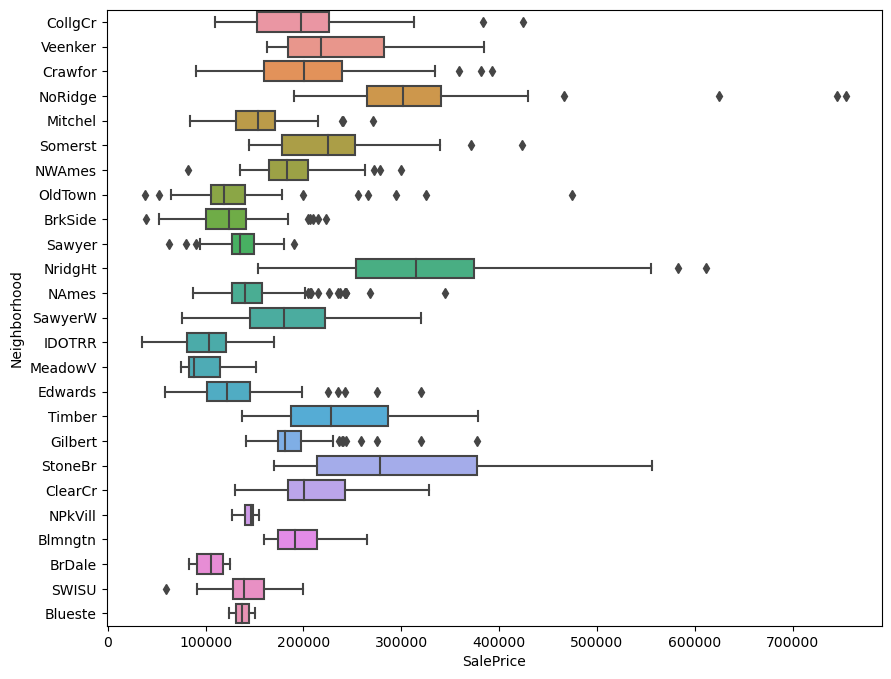

In [4]:
# Discarding neighborhood after doing boxplot

sb.boxplot(x = df_train.SalePrice,
           y = df_train.Neighborhood)


In [5]:
# Descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Great, minimal price is larger than zero.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

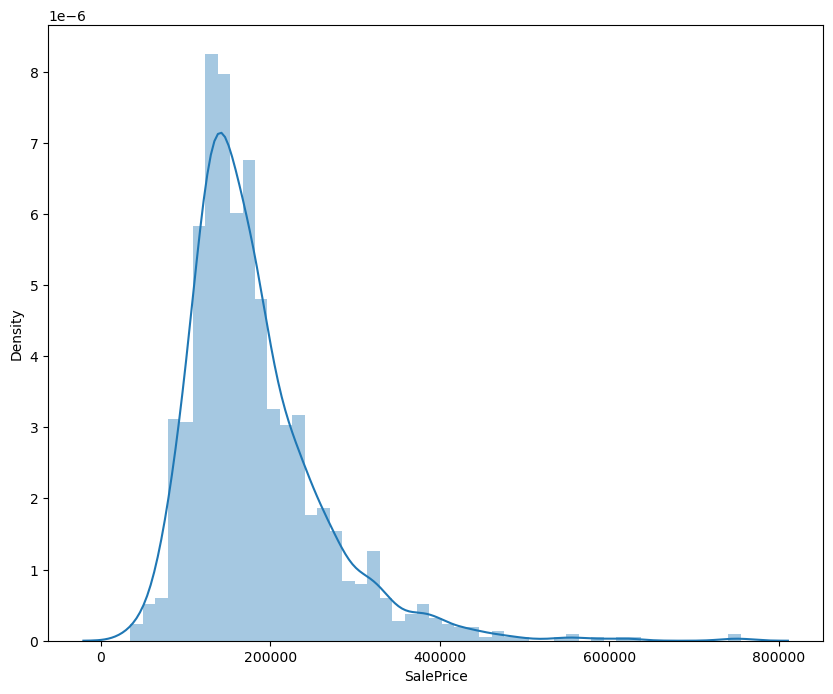

In [6]:
# So, let's gonna see the distribution.
# Histogram
sb.distplot(df_train['SalePrice'])

##### Seeing the histogram we can see a appreciable positive skewness
##### Also, look at these pealednedd. It seemed a laptoquantic kurtosis.

In [7]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 'Amazing! If my love calculator is correct, our success probability is 97.834657% (??????)

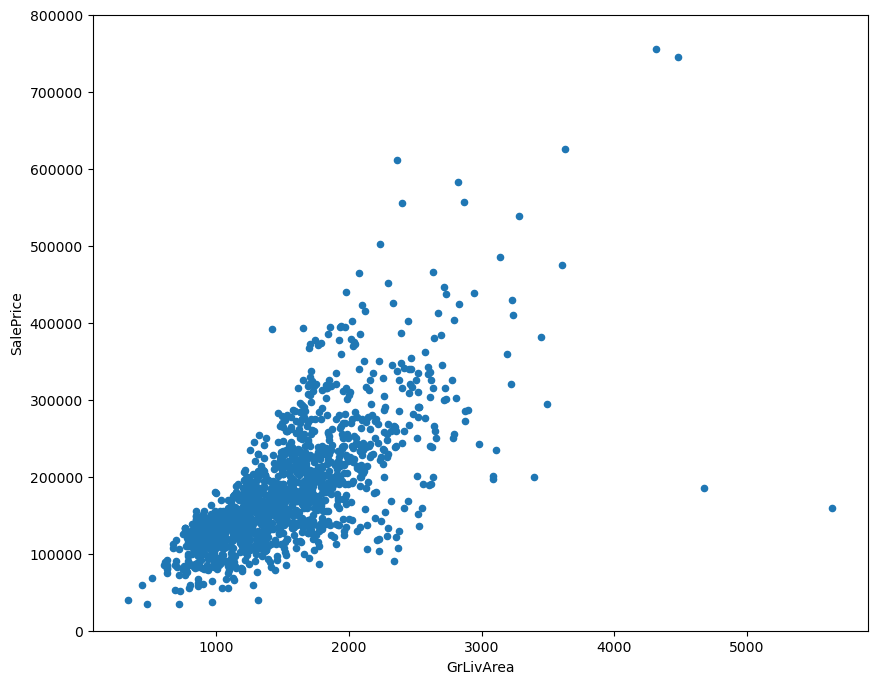

In [8]:
# Relationship with numerical vairables
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

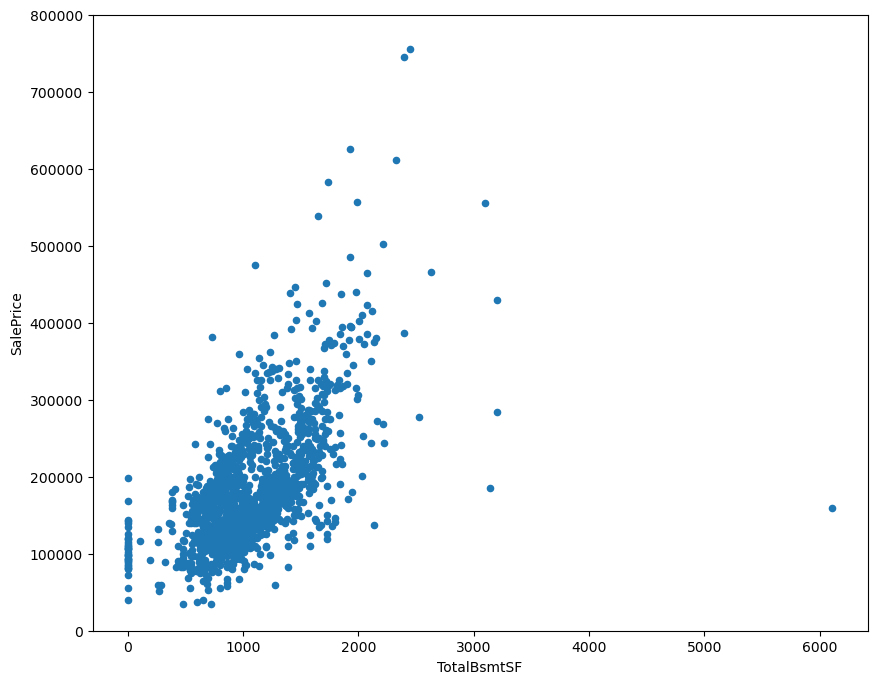

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

### it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

(-0.5, 9.5, 0.0, 800000.0)

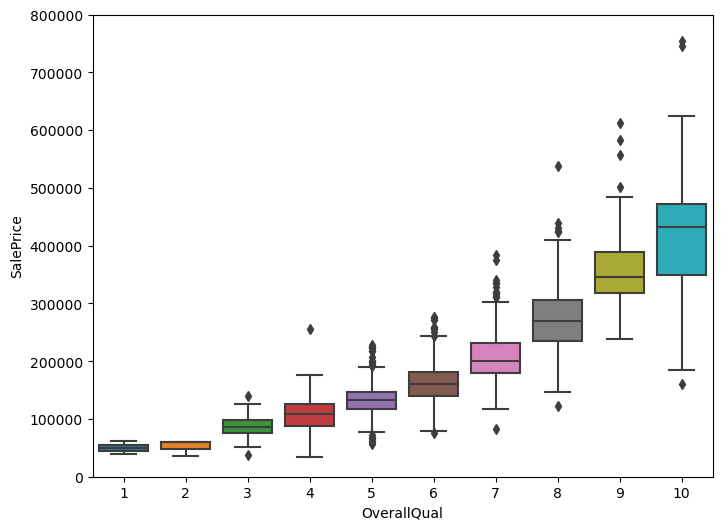

In [10]:
# Relationship with categorical features
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sb.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)


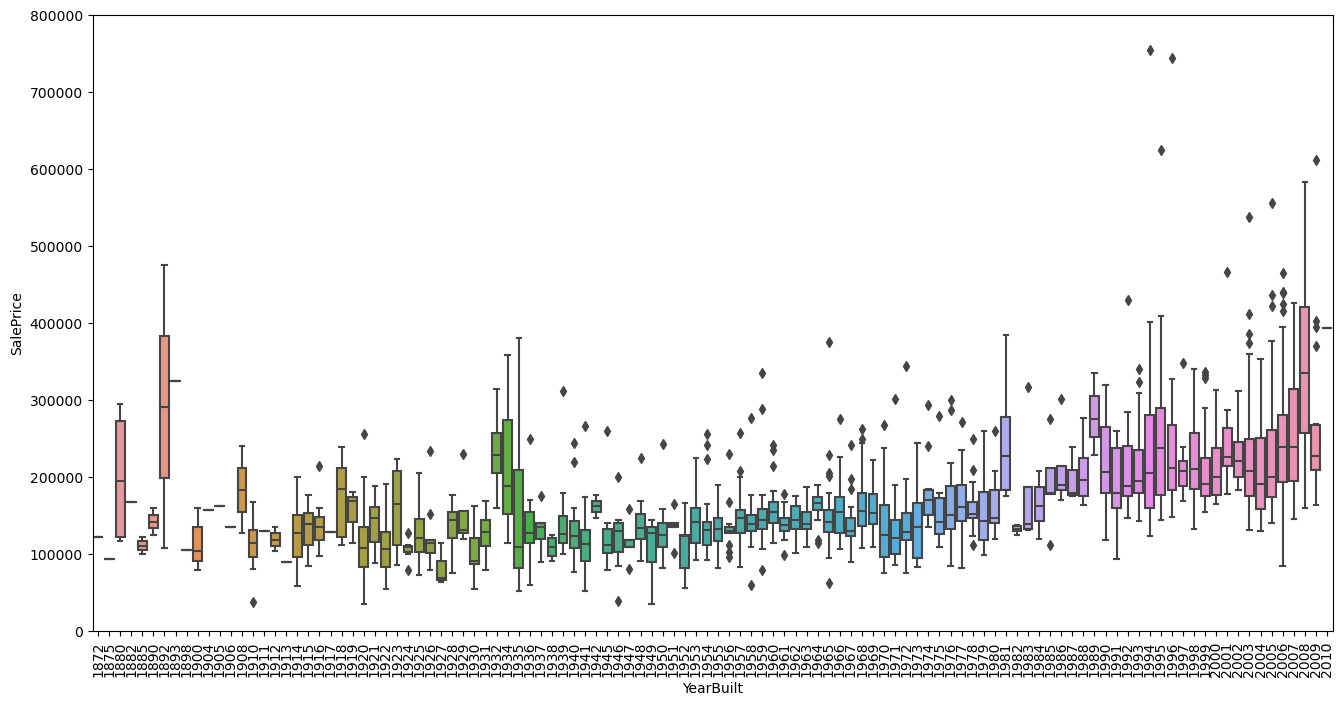

In [11]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize=(16,8))
fig = sb.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation=90);

### Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.
### We don't know if SalePrice is in constant prices

In [12]:
#In summary

#Stories aside, we can conclude that:

#    'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
#    'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.



### Time to do a more objetive analysis !!!

<AxesSubplot:>

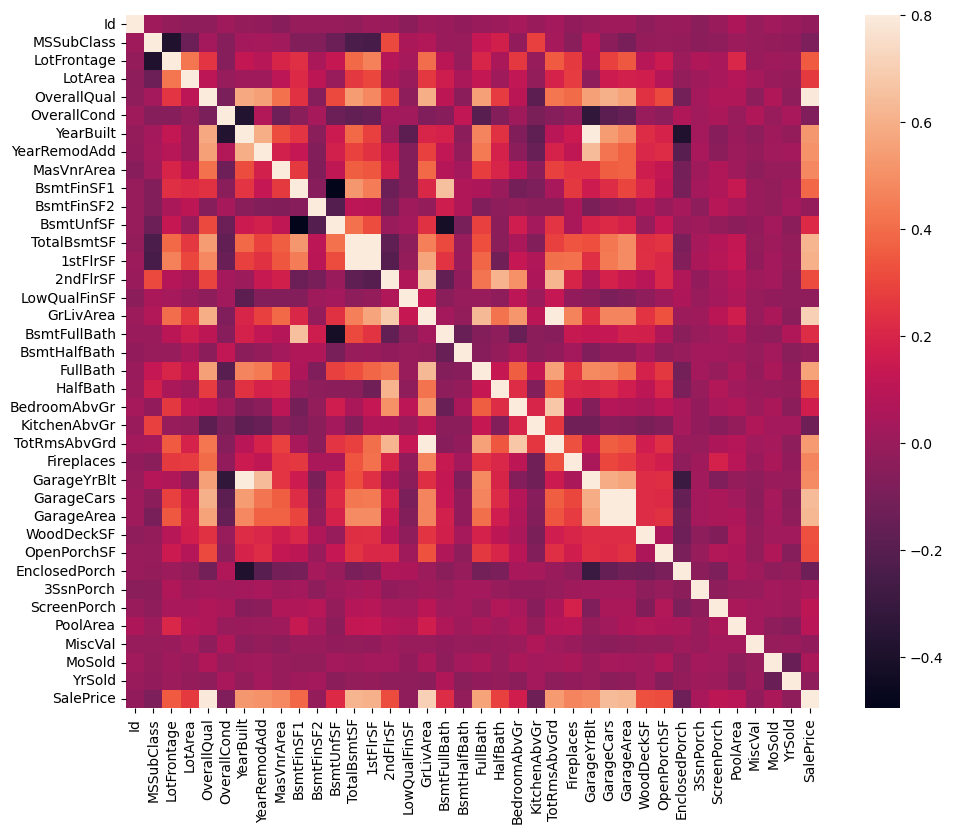

In [13]:
# Correlation matrix (heatmap style)

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sb.heatmap(corrmat, vmax=.8, square=True)

In [14]:
# 'TotalBsmtSF' and '1stFlrSF' variables are multicollinearity !

In [15]:
# 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!',

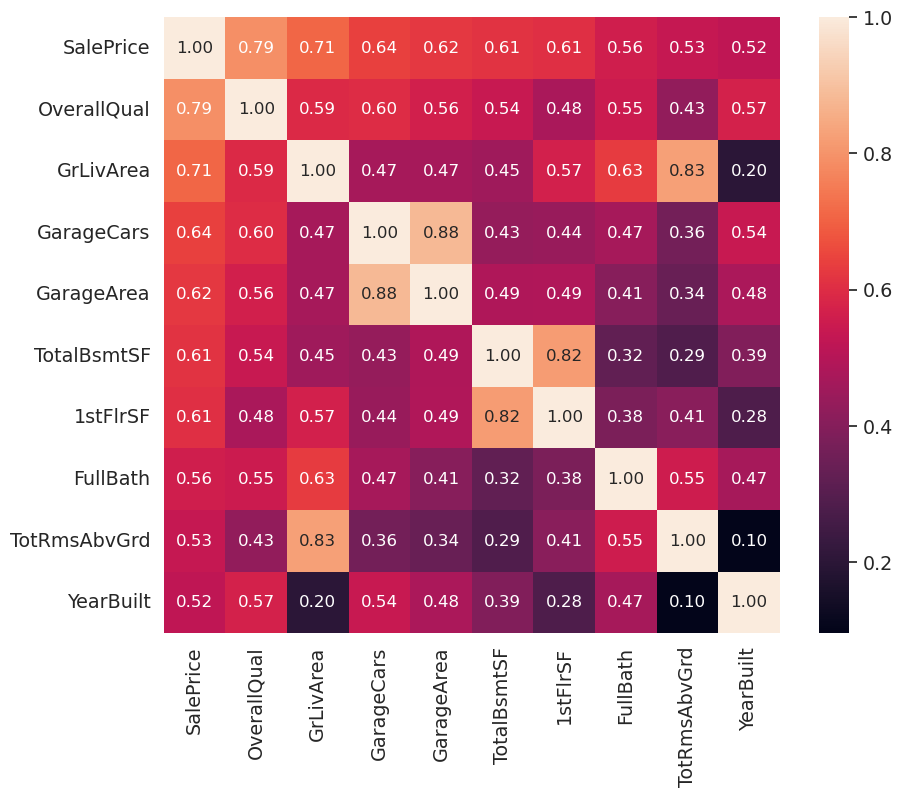

In [16]:
# Saleprice correlation matrix (zoomed heatmap style)

k = 10 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # Sort correlations by highest value
cm = np.corrcoef(df_train[cols].values.T) # Param must be transposed
sb.set(font_scale=1.25) # Font size of graph variables
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
# Most correlationed : 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'
# GarageArea' are like twin brothers. We can keep 'GarageCars' since its correlation with 'SalePrice' is higher
# TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF'.
# 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
# It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. This probably requires a time-series analysis 

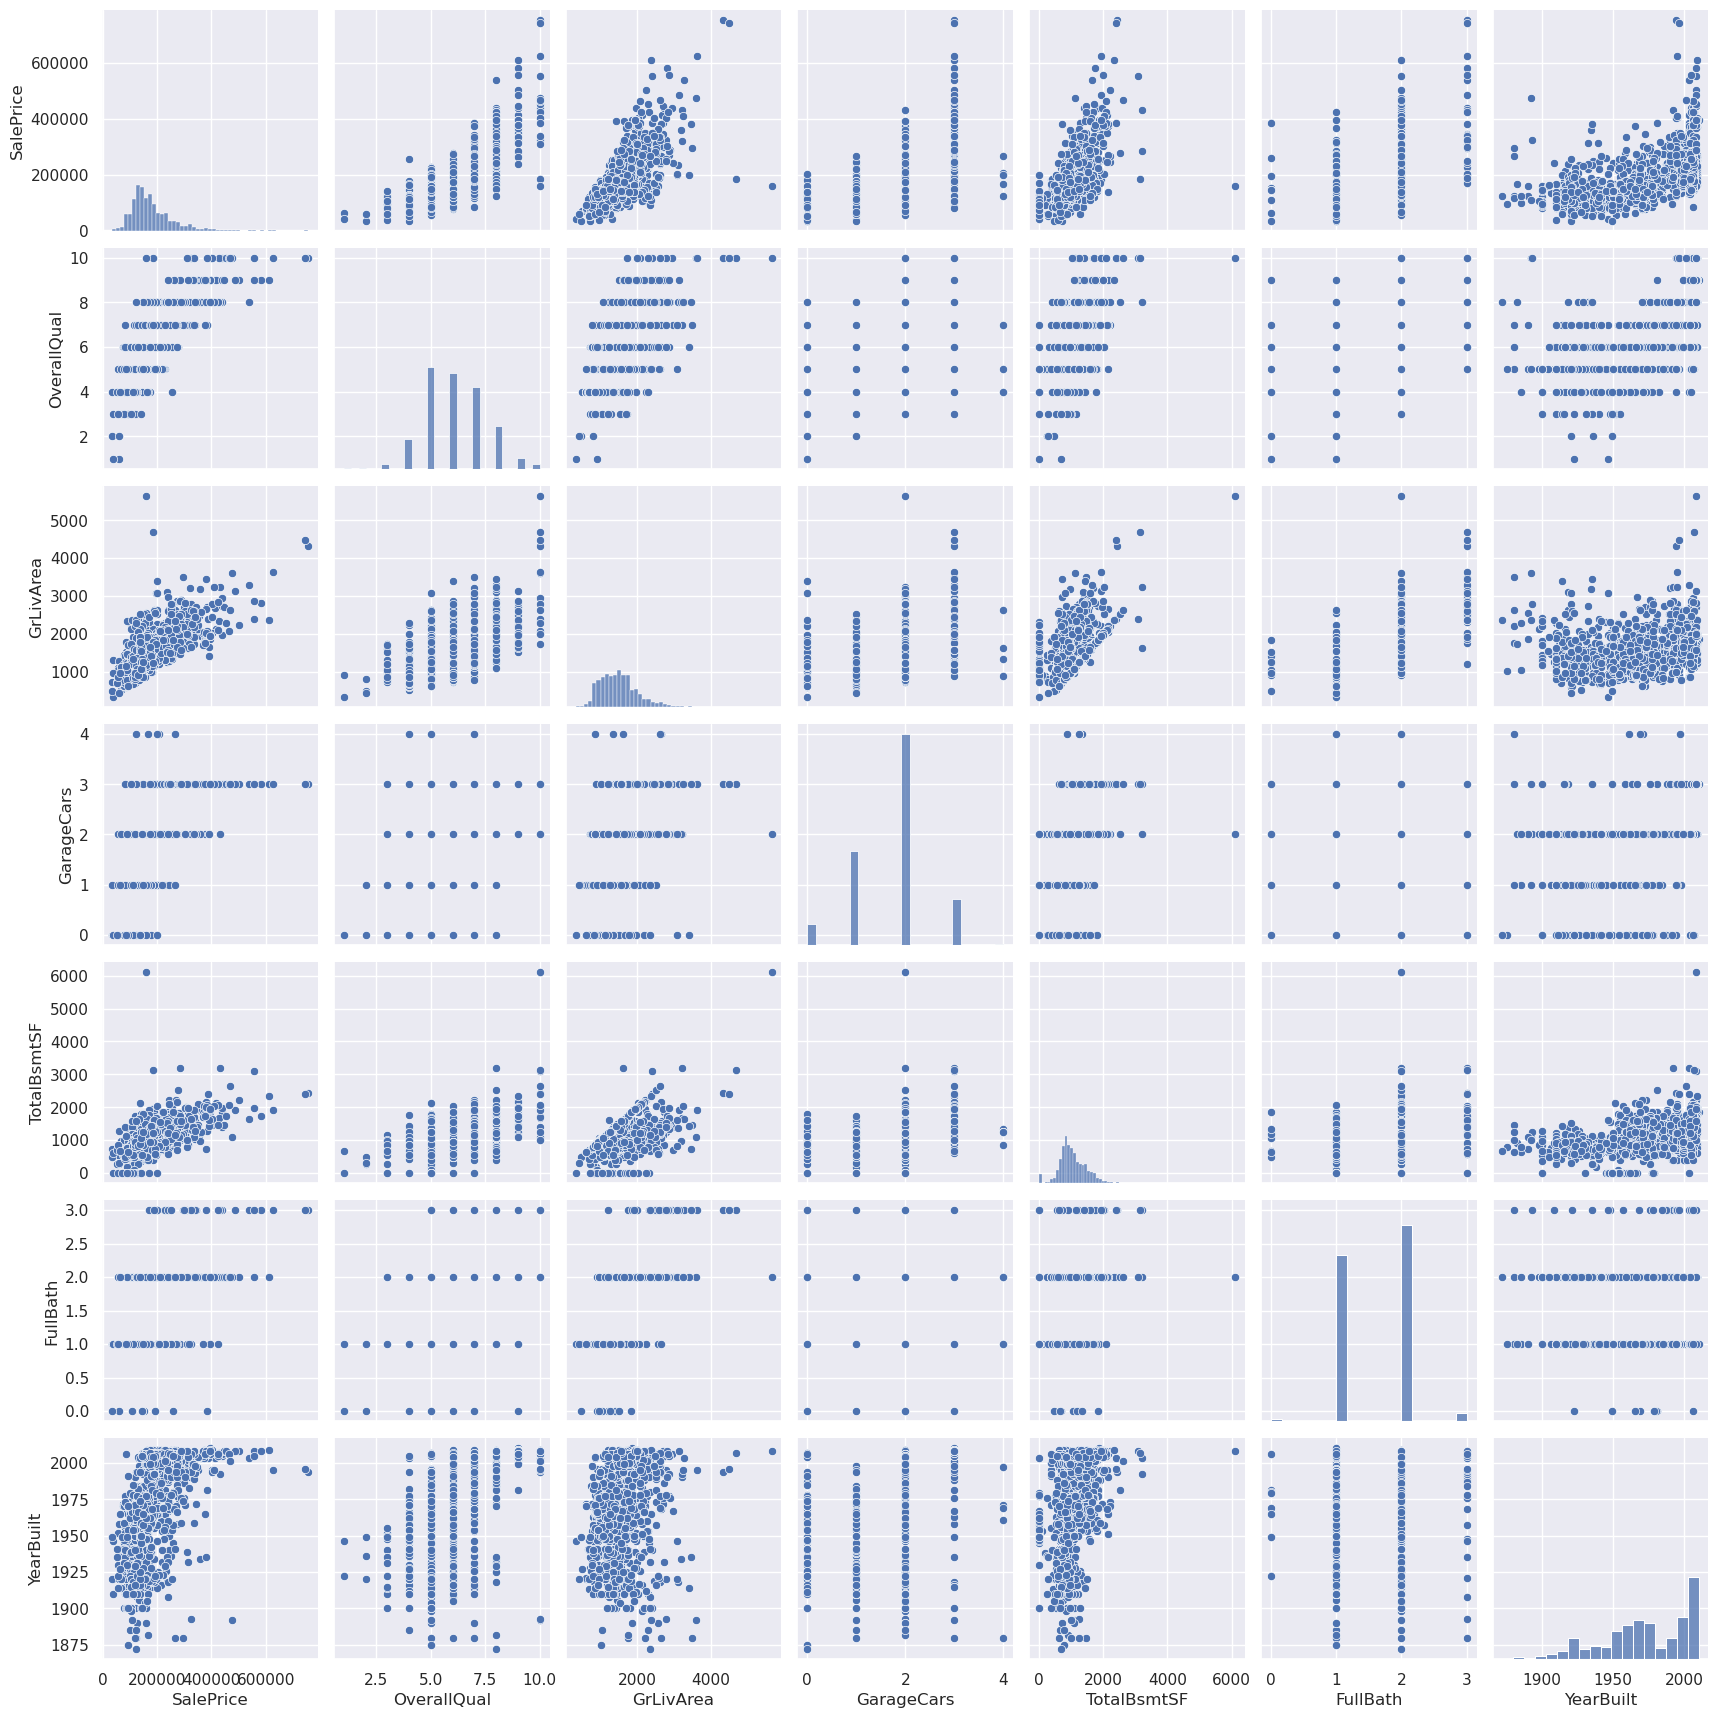

In [18]:
# scatterplot
sb.set() # Apply default seaborn theme
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sb.pairplot(df_train[cols], size = 2.5)
plt.show()

In [19]:
# Relationship between 'TotalBsmtSF' and 'GrLiveArea' are interesting, many plots appears like a linear border. Thats why basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living are.
# The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative).
# Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).
# Not so cool :c 

### 4) Missing data 

##### - How prevalent is the missing data?
##### - Is missing data random or does it have a pattern?

#### We need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [20]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending=False) # Sum all null values each variable
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) # Null percent each variable
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent']) # Concat created variables
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [21]:
percent

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

#### We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed.  

#####  We can see that 'GarageX' variables have the same number of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

##### Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

##### Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

##### In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [22]:
# Dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index , 1) # Drop all variables with more than one missed register
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) # Drop the unique null register by Electrical
df_train.isnull().sum().max() # Just to check that there's no missing data

0

### Time to detect outliars.


In [23]:
# Standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis]) # Converting data values to have mean 0 and sd of 1
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10] # Argsort return an array index of sort values of first 10 values
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:] # Argsort return an array index of sort values of last 10 values
print(low_range,'\n')
print(high_range,'\n')

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]] 

[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]] 



##### Low range values are similar and not too far from 0. High range values are far from 0 and the 7.something values are really out of range. For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

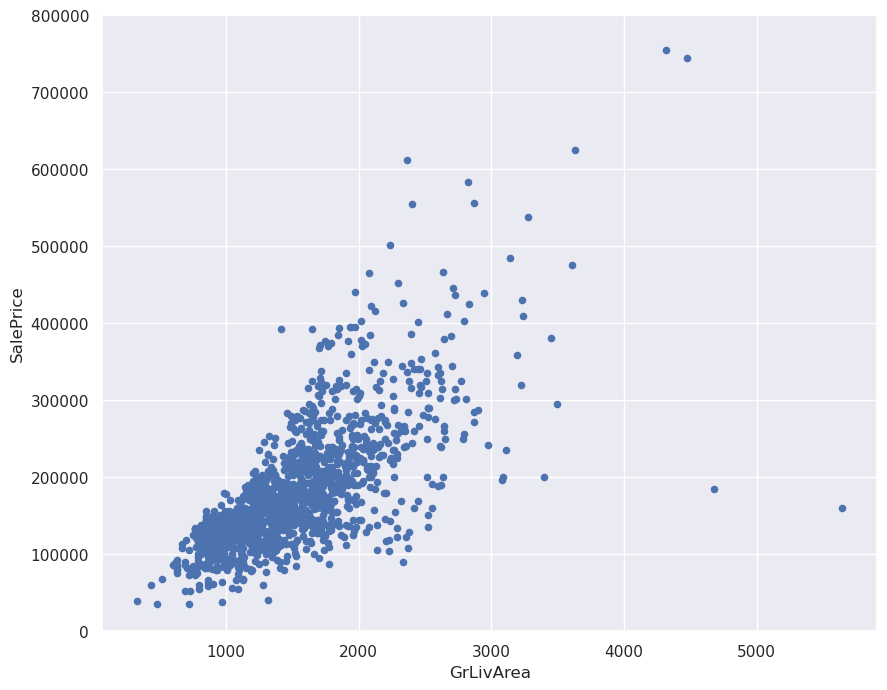

In [24]:
# Bivariate analysis between saleprice grlivarea

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

##### The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and DELETE them.

##### The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will KEEP them.

In [25]:
# Delete two values with bigger 'GrLivArea', beacuse seem strange and they are not following the crowd.
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

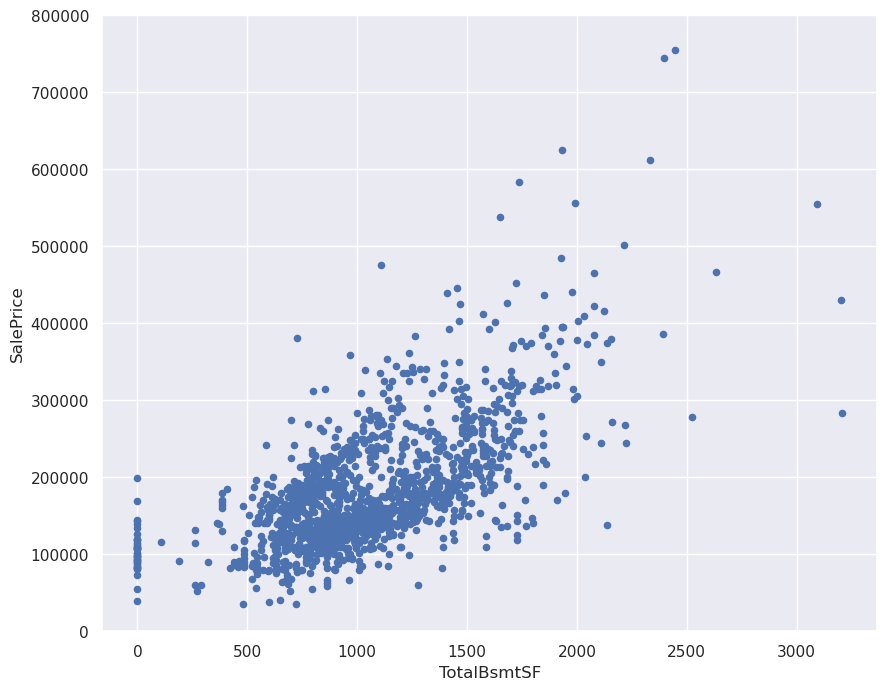

In [26]:
# Bivariate analysis saleprice/grlivarea without outliars
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

### Assumptions underlying the statistical bases for multivariate analysis

##### Normality :  When we talk about normality what we mean is that the data should look like a normal distribution. Remember that univariate normality doesn't ensure multivariate normality. (>200 observations) normality is not such an issue

#####  Homoscedasticity: The 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)'. The variance remains along data.

###### Linearity: The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations.

##### Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

###  The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

##### Histogram - Kurtosis and skewness.
##### Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

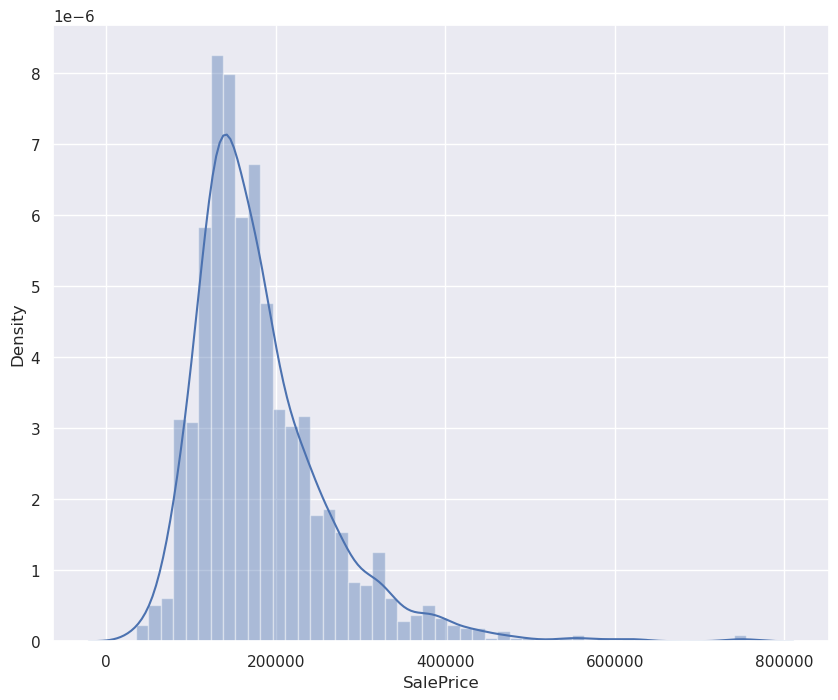

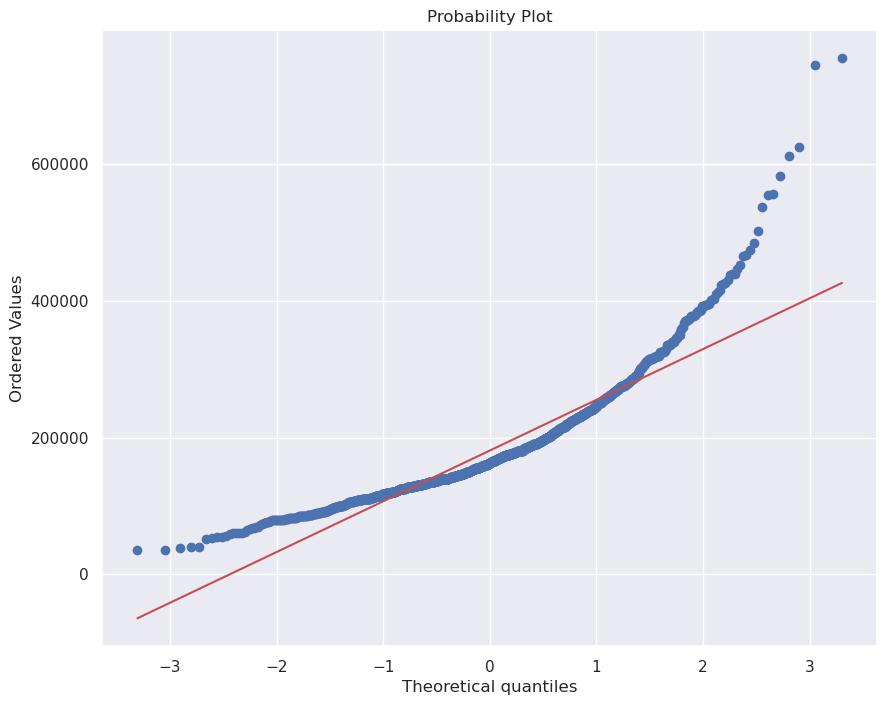

In [27]:
# Histogram and normal probability plot
sb.distplot(df_train['SalePrice']); # fit=norm to draw desired curve
fig = plt.figure() # show dist
res = stats.probplot(df_train['SalePrice'], plot=plt) # Take a plot and a data and show a probability plot

##### Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
##### But, a simple data transformation can solve the problem.

In [28]:
# SalePrice is not normal, has a positive skewness and doesn't follow the diagonal line

# Let's apply a log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

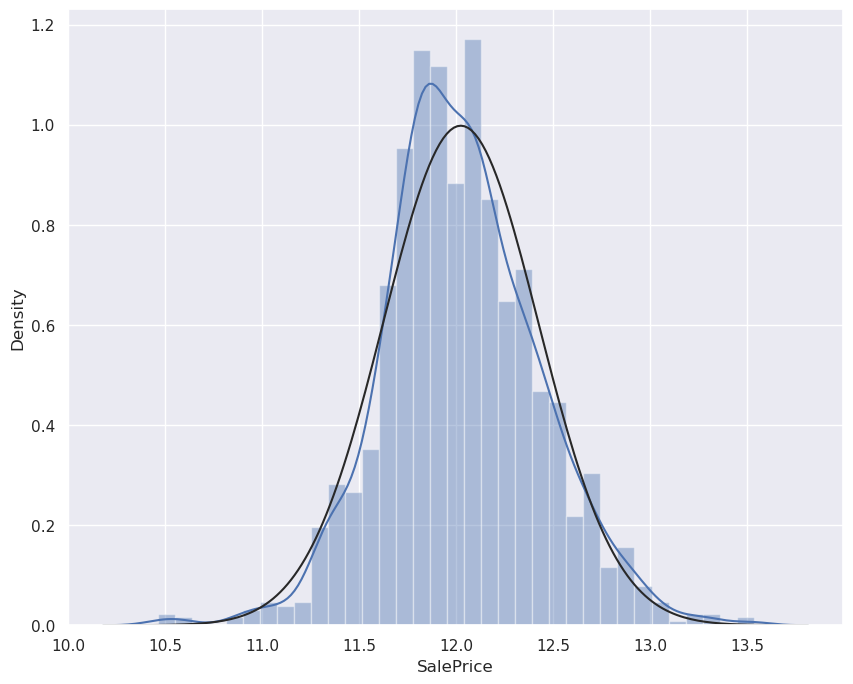

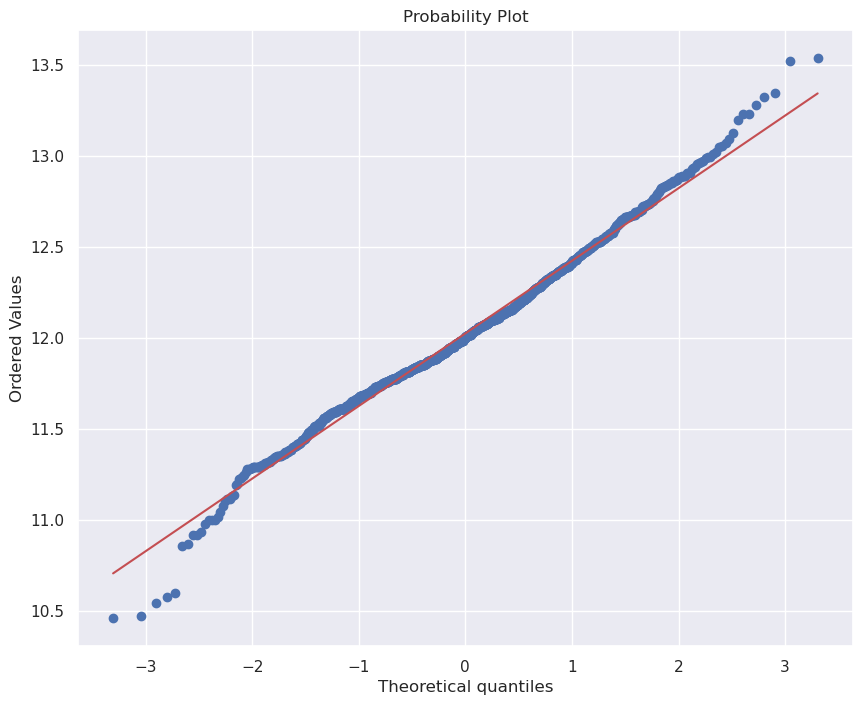

In [29]:
# Transformed histogram and normal probability plot
sb.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### Done! Let's check what's going on with 'GrLivArea'.

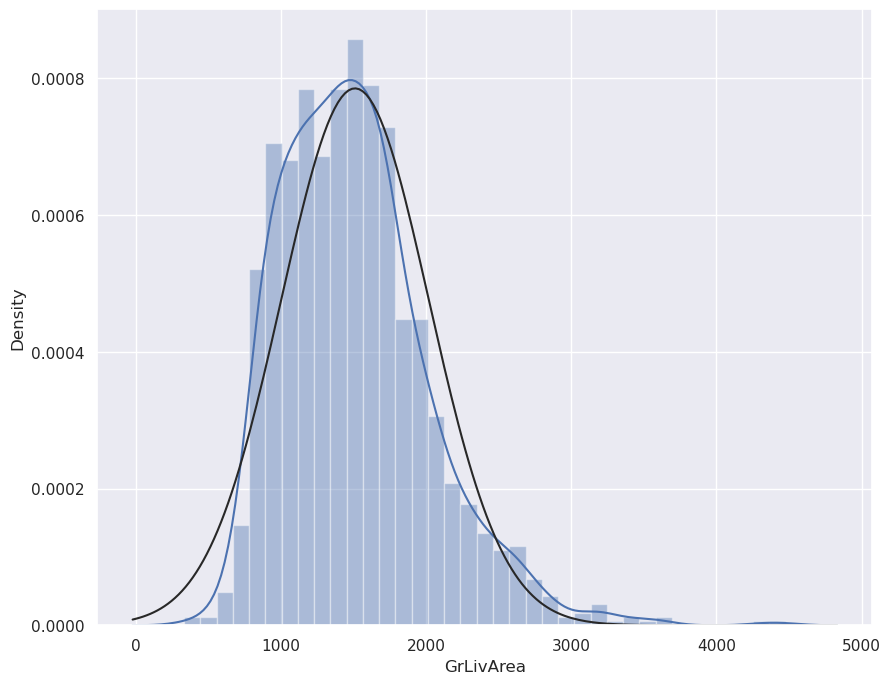

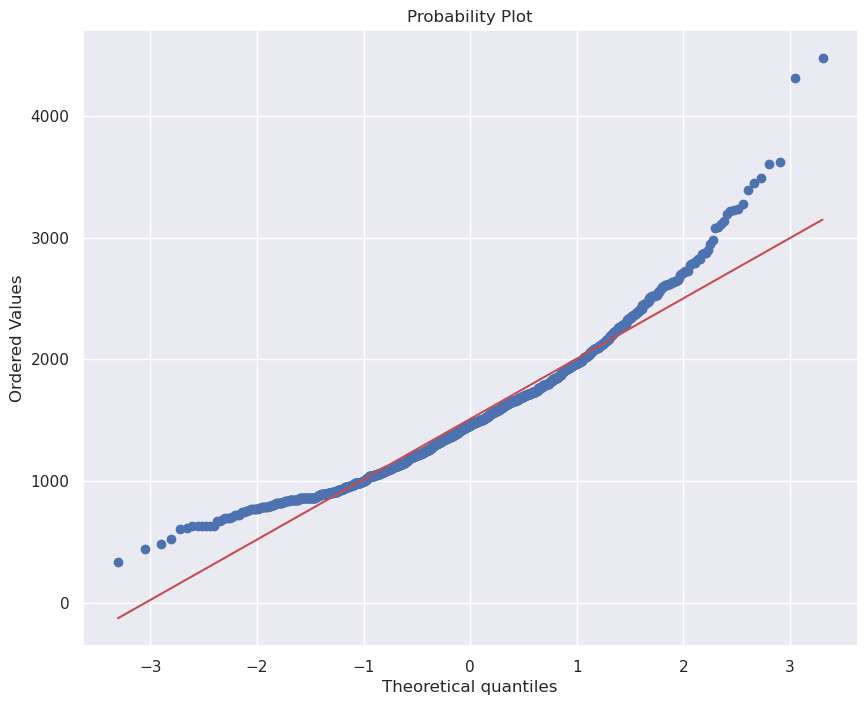

In [30]:
# Histogram and normal probability plot
sb.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [31]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

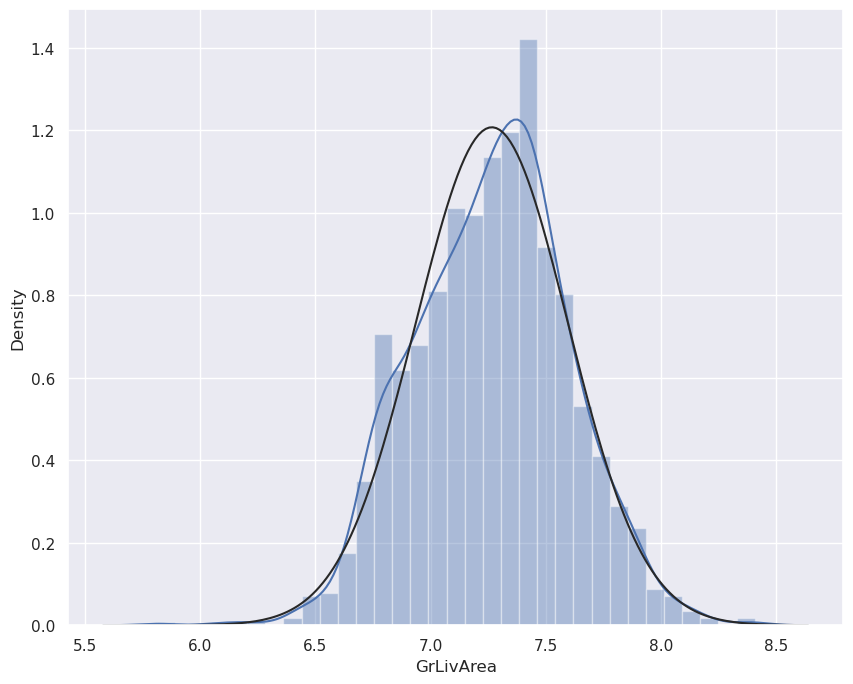

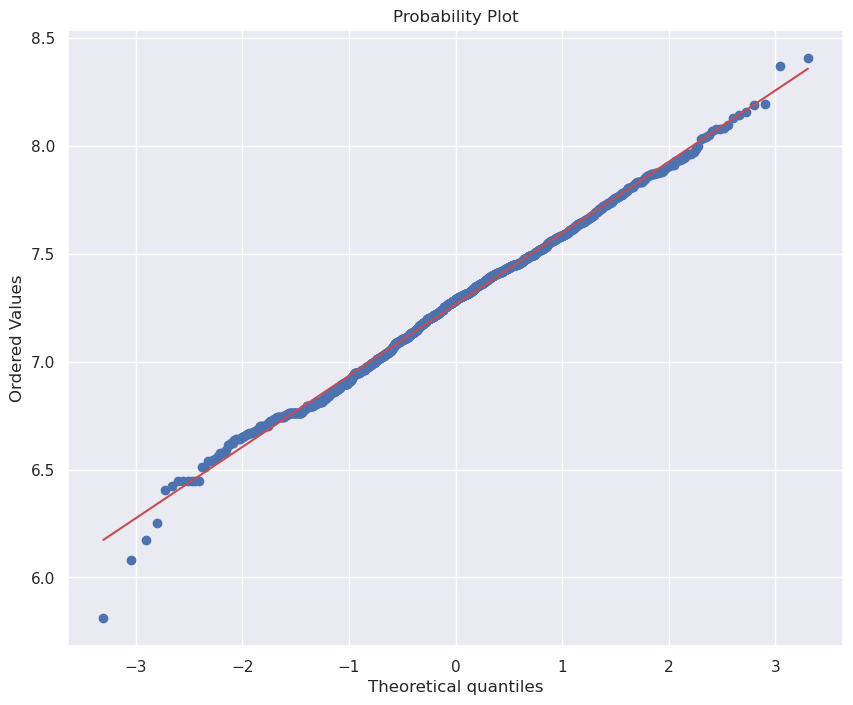

In [32]:
#transformed histogram and normal probability plot
sb.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

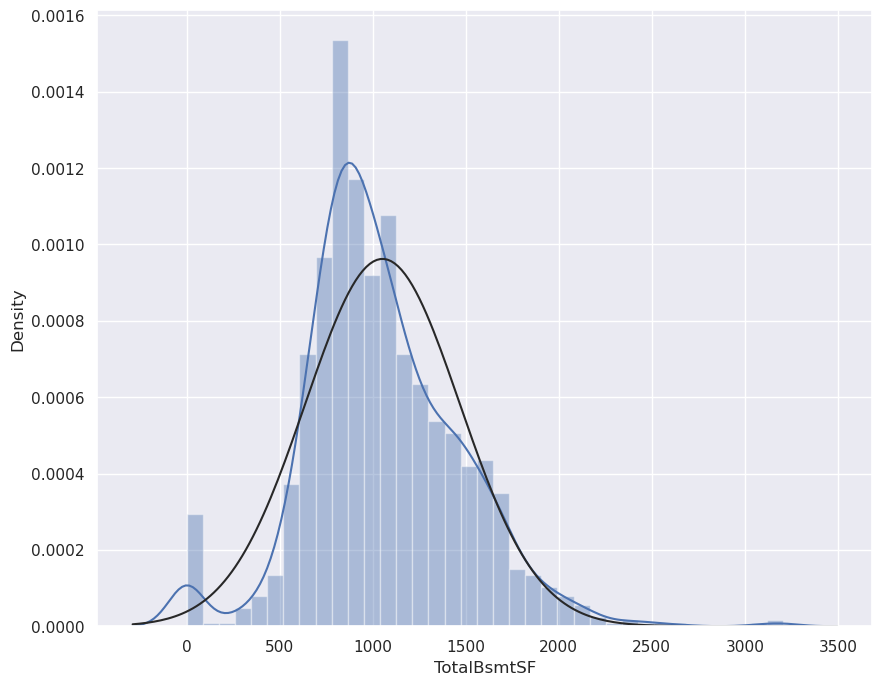

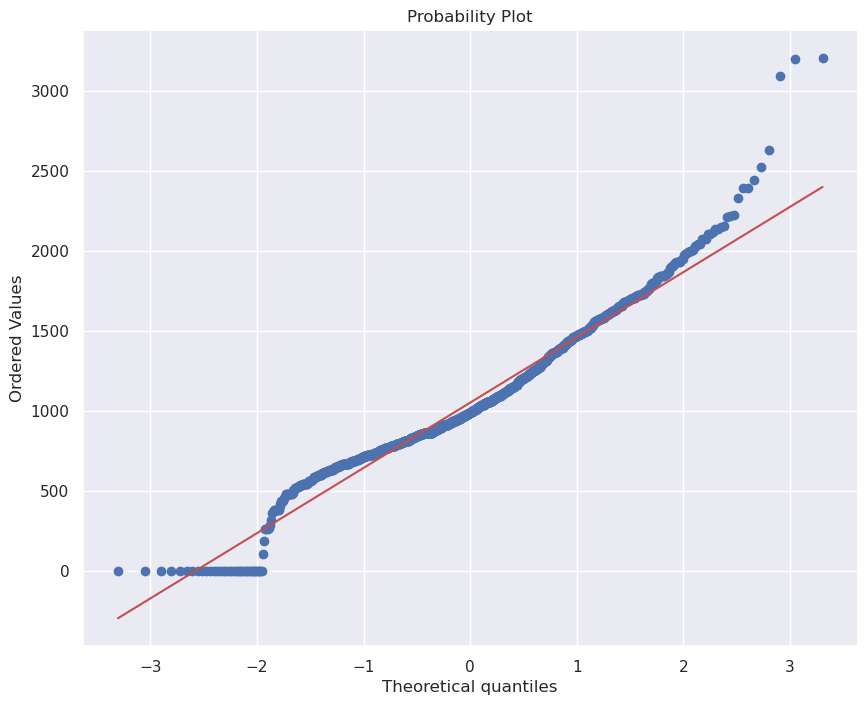

In [33]:
#histogram and normal probability plot
sb.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

### Ok, now we are dealing with the big boss. What do we have here?

    Something that, in general, presents skewness.
    A significant number of observations with value zero (houses without basement).
    A big problem because the value zero doesn't allow us to do log transformations.


##### The following procedure is to avoid losing any data

In [34]:
# Create column for new variable (one is enogh beacse it's binary categorical feature)
# id area>0 it gets 1, for area == 0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [35]:
# Transform data
df_train.loc[df_train['HasBsmt'] == 1,'TotalBsmtSF']  = np.log(df_train['TotalBsmtSF']) # no.log only in cases where 'HasBsmt' == 1 

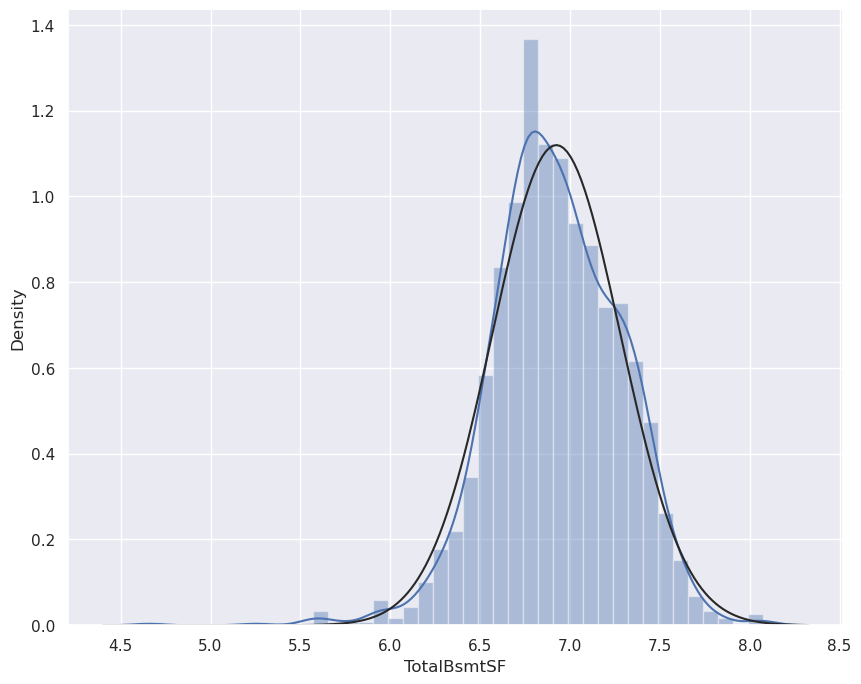

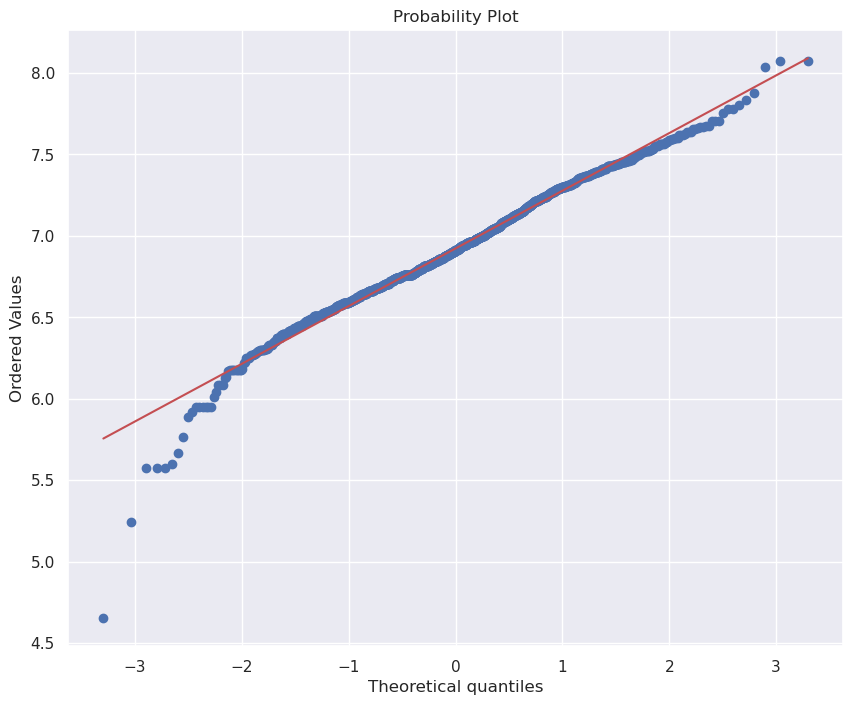

In [36]:
# Histogram and normal probability plot
sb.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt) 

###  In the search for writing 'homoscedasticity' right at the first attempt

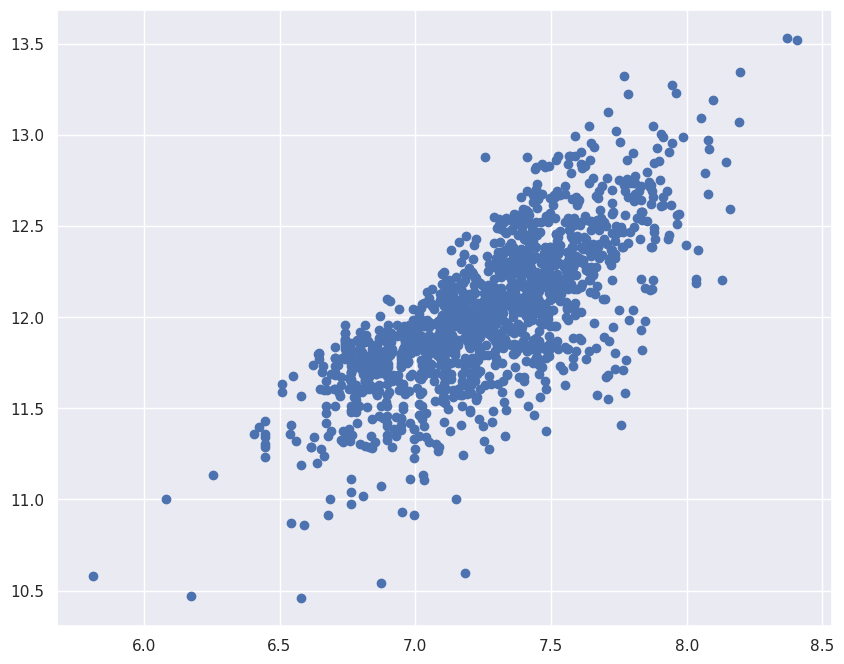

In [37]:
#scatter plot GrLivArea and SalePrice
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

##### No conic shape, the power of normality!!!!

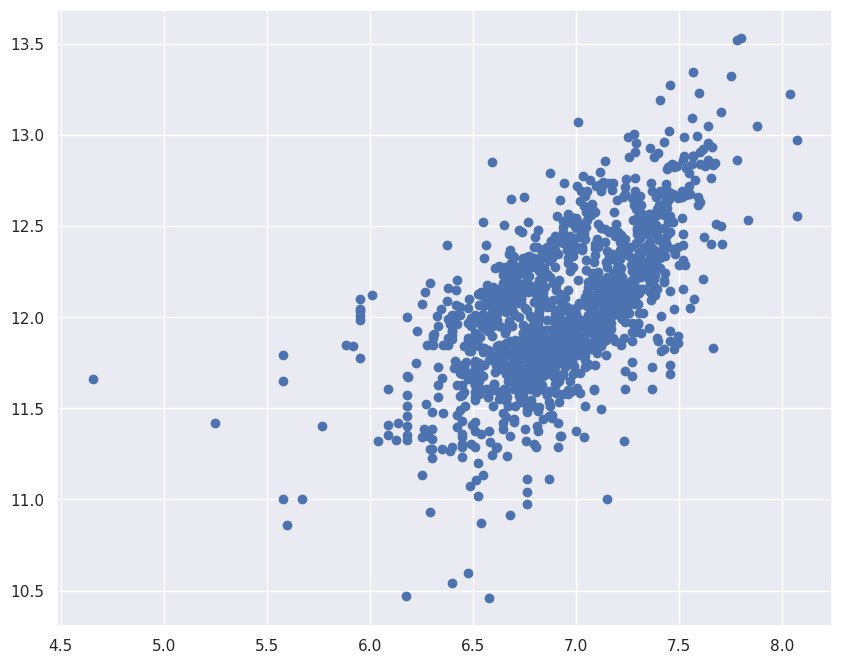

In [38]:
#scatter plot between TotalBsmtSF and SalePrice
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [39]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,1


In [40]:
#convert categorical variable into dummy variables
a = pd.get_dummies(df_train)
a.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [41]:
a.iloc[:,200:210]

,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con
0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0
1456,0,0,0,0,0,0,1,0,0,0
1457,0,0,0,1,0,0,1,0,0,0
1458,0,0,0,1,0,0,1,0,0,0
